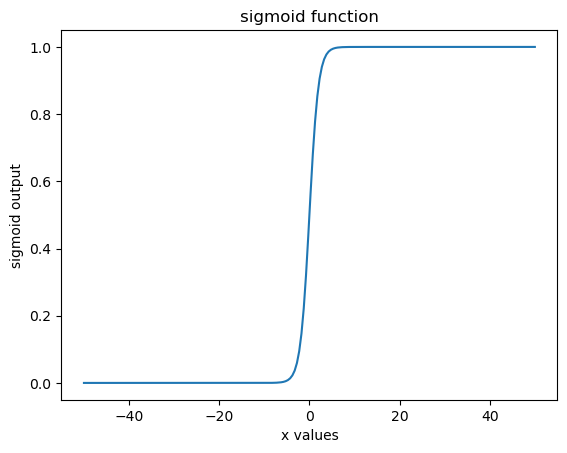

The parameters of hypothesis function(regression line) for minimum value of MSE  are (-6.375873099753046, 7.582801356212136, 7.78222770440258) respectively.
w0 = -6.375873099753046
w1 = 7.582801356212136
w2 = 7.78222770440258
The minimum value of cost function thus obtained is 0.0603886938956913 


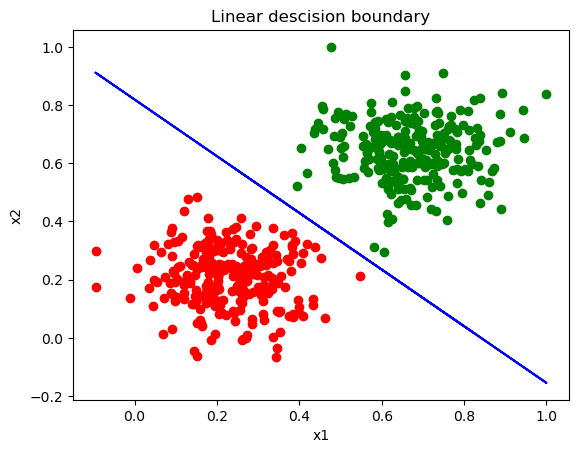

In [1]:
#LAB 10 Part1
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import math
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import datasets
x = np.linspace(-50,50,200)
y = 1/(1+np.exp(-1*x))
pl.plot(x,y)
pl.xlabel('x values')
pl.ylabel('sigmoid output')
pl.title('sigmoid function')
pl.show()
'''The sigmoid function is a common choice for modeling the probability of a binary outcome in classification problems because it maps any input value to a value between 0 and 1. This makes it a suitable choice for problems where the goal is to predict a binary outcome (e.g., true/false, yes/no), as it allows us to interpret the output of the model as a probability
When used in a classification algorithm, the sigmoid function is typically applied to the output of a linear regression function, which provides a continuous prediction score for each data point. The sigmoid function then transforms these scores into probabilities that can be used to classify each data point.
Another advantage of the sigmoid function is that it has a well-defined derivative, which makes it easy to use in optimization algorithms for training machine learning models. In particular, the derivative of the sigmoid function has a simple and interpretable form, which allows us to compute gradients efficiently using backpropagation'''


df=pd.read_csv('Logistic_regression_ls.csv')
totalcolumns = ['x1','x2']
input_train = df.loc[:, totalcolumns]
output_train= df.loc[:,'label']
def J(*args):
    lst = np.array(args)
    g = lst[0]
    for i in range(input_train.shape[1]):#Hypothesis function
        #print(input_train[i])
            a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
            g = g+lst[i+1]*a
    h = 1/(1+np.exp(-1*g))
    out = np.array(output_train)
    m = len(input_train)  
    sum1 = 0
    for i in range(m):
        sum1 = sum1+(-out[i]*(math.log(h[i]))-(1-out[i])*(math.log(1-h[i])))
    J = sum1/(m)
    return J


    
def gradJ(*args):
    lst = args[0]
    g = lst[0]
    for i in range(input_train.shape[1]):#Hypothesis function
        #print(input_train[i])
            a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
            g = g+lst[i+1]*a
    h = 1/(1+np.exp(-1*g))
    out = np.array(output_train)
    m = len(input_train)  
    grad = []
    sum0 = 0
    for i in range(m):
        sum0 = sum0 + (h[i] - out[i])
    J1 = sum0/m
    grad.append(J1)
    for i in range(input_train.shape[1]):
        sum2 = 0
        a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
        for j in range(m):
            sum2 = sum2+(h[j] - out[j])*a[j]
        J2 = sum2/m
        grad.append(J2)
        
    grad_J = np.array(grad)
    return grad_J
class unidirection_search():#line search
    def __init__(self,w_s,s):
        self.w_s = w_s
        self.s = s
    def u_s(self,a):
        num = input_train.shape[1]
        self.array = []
        for i in range(num+1):
            self.array.append(self.w_s[i]  + a*self.s[i])
        j1 = J(*self.array)
        return j1
    def critical(self,a,b,n):
        self.delta  = (b-a)/n
        self.a1 = a
        self.a2 = self.a1+self.delta
        self.a3 = self.a2+self.delta
        while self.a3<=b:
            if self.u_s(self.a1)>=self.u_s(self.a2)<=self.u_s(self.a3):
                self.tup1 = (self.a1,self.a3)
                return self.tup1
            else:
                self.a1 = self.a2
                self.a2 = self.a3
                self.a3 = self.a3 + self.delta
        self.tup = 0 
        self.tup1 = b
   
    def interval_halving(self,a,b):
        self.E = 0.000001
        self.a = a
        self.b = b
        self.L = self.b-self.a
        self.a_m = (self.a+self.b)/2
        while abs(self.L)>=self.E:
            self.Ja = self.u_s(self.a_m)
            self.a1 = self.a+self.L/4
            self.a2 = self.b-self.L/4
            self.Ja1 = self.u_s(self.a1)
            self.Ja2 = self.u_s(self.a2)
            if self.Ja1 < self.Ja:
                self.b = self.a_m
                self.a_m = self.a1
            elif self.Ja2 < self.Ja:
                self.a = self.a_m
                self.a_m = self.a2
            else:
                self.b = self.a2
                self.a = self.a1
                self.a_m = (self.a+self.b)/2
            self.L = self.b-self.a
        self.tup_3 = (self.a,self.b)
        return (self.tup_3[0]+self.tup_3[1])/2
class steepest_gradient():#steepest gradient descent
    def __init__(self,w_s,E1,E2):#w_s is the starting point and s is the direction vector (in this case it will be -grad(J))
        self.w_s = w_s
        self.E1 = E1
        self.E2 = E2
    def grad_des(self,a,b):#gradient descent procedure
        c = unidirection_search(self.w_s,-1*gradJ(self.w_s))#Finding correct alpha using linear search
        self.a = c.interval_halving(a,b) 
        num = input_train.shape[1]
        self.array = []
        for i in range(num+1):
            self.array.append(self.w_s[i]  + self.a*(-gradJ(self.w_s)[i]))
        self.grad_1 = gradJ(self.array)
        self.J1 = J(*self.array)
        self.k = 0
        while np.linalg.norm(self.grad_1) > self.E1 and self.k<=1000 :#stopping criteria
            c = unidirection_search(self.array,-1*self.grad_1)
            self.a = c.interval_halving(a,b)
            self.array1 = []
            for i in range(num+1):
                    self.array1.append(self.array[i]  + self.a*(-gradJ(self.array)[i]))
            
            if abs(np.dot(gradJ(self.array),gradJ(self.array1))) < self.E2:#stopping criteria
                  break
            self.array = self.array1
            self.grad_1 = gradJ(self.array)
            self.k += 1
        return self.array
     
    def minimum(self):
        min_J = J(*self.array) 
        return min_J
# w_s = [2,0.1,0.1]
w_s = [0,0.1,0.5]
J(*w_s)
a = 0
b = 100#put b>=1 to get the perfect value of 0 as minimum
E1 = 0.0000001
E2 = 0.0000001
# n = 100
c1 = steepest_gradient(w_s,E1,E2)
w = tuple(c1.grad_des(a,b))
print(f"The parameters of hypothesis function(regression line) for minimum value of MSE  are {w} respectively.")
print(f'w0 = {w[0]}')
print(f'w1 = {w[1]}')
print(f'w2 = {w[2]}')
J_min = c1.minimum()
print(f"The minimum value of cost function thus obtained is {J_min} ")
x1 = np.array(input_train.iloc[:,0]/max(input_train.iloc[:,0]))
x2 = np.array(input_train.iloc[:,1]/max(input_train.iloc[:,1]))
m = len(input_train) 
x1_1 = []
x1_2 = []
x2_1 = []
x2_2 = []
for i in range(m): 
    if output_train[i] == 1:
        x1_2.append(x1[i])
        x2_2.append(x2[i])
    elif output_train[i] == 0:
        x1_1.append(x1[i])
        x2_1.append(x2[i])
pl.scatter(x1_2,x2_2,c = 'g')
pl.scatter(x1_1,x2_1,c = 'r')
#For descision line sigmoid output should be 0 so w0x0+ w1x1 + w2x2 = 0
x2_desc = (-w[0]/w[2]) - (w[1]/w[2])*x1
pl.plot(x1,x2_desc,c='b')
pl.title("Linear descision boundary")
pl.xlabel("x1")
pl.ylabel("x2")
pl.show()